#   Análise de dados eleitorado 2020 por municípios
Fonte -> https://www.tse.jus.br/eleicoes/estatisticas/estatisticas-eleitorais

Arquivo -> eleitorado_municipio_2020.csv

In [1]:
#  Definindo funções para exibir resutados
def topo(x):
    print(f'''{"-"*55}\n{x:^56}\n{"-"*55}''')
def lin():
    print(55*'-')


#   Importando bibliotecas e criando o DataFrame
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('eleitorado_municipio_2020.csv', encoding='cp1252', sep=';')


In [2]:
#   Visualizando o DataFrame
df.head().T

,0,1,2,3,4
NR_ANO_ELEICAO,2020,2020,2020,2020,2020
CD_PAIS,1,1,1,1,1
NM_PAIS,Brasil,Brasil,Brasil,Brasil,Brasil
SG_REGIAO,N,N,N,N,N
NM_REGIAO,Norte,Norte,Norte,Norte,Norte
SG_UF,AC,AC,AC,AC,AC
NM_UF,Acre,Acre,Acre,Acre,Acre
CD_MUNICIPIO,1120,1570,1058,1007,1015
NM_MUNICIPIO,ACRELÂNDIA,ASSIS BRASIL,BRASILÉIA,BUJARI,CAPIXABA
QTD_ELEITORES,9169,5913,16844,9613,7540


In [3]:
#   Visualizando tipos primitivos e se existem valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5568 entries, 0 to 5567
Data columns (total 43 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   NR_ANO_ELEICAO                   5568 non-null   int64 
 1   CD_PAIS                          5568 non-null   int64 
 2   NM_PAIS                          5568 non-null   object
 3   SG_REGIAO                        5568 non-null   object
 4   NM_REGIAO                        5568 non-null   object
 5   SG_UF                            5568 non-null   object
 6   NM_UF                            5568 non-null   object
 7   CD_MUNICIPIO                     5568 non-null   int64 
 8   NM_MUNICIPIO                     5568 non-null   object
 9   QTD_ELEITORES                    5568 non-null   int64 
 10  QTD_ELEITORES_FEMININO           5568 non-null   int64 
 11  QTD_ELEITORES_MASCULINO          5568 non-null   int64 
 12  QTD_ELEITORES_NAOINFORMADO       5

In [4]:
display(df['NM_MUNICIPIO'])

0         ACRELÂNDIA
1       ASSIS BRASIL
2          BRASILÉIA
3             BUJARI
4           CAPIXABA
            ...     
5563      TOCANTÍNIA
5564        TUPIRAMA
5565      TUPIRATINS
5566    WANDERLÂNDIA
5567         XAMBIOÁ
Name: NM_MUNICIPIO, Length: 5568, dtype: object

#   Verificamos a existência de 5568 municípios, que é o número total de municípios brasileiros, segundo o IBGE 2021.
fonte -> https://www.ibge.gov.br/geociencias/organizacao-do-territorio/estrutura-territorial/15761-areas-dos-municipios.html#:~:text=Sobre%20a%20publica%C3%A7%C3%A3o%20%2D%202021&text=Introdu%C3%A7%C3%A3o-,As%20estimativas%20da%20popula%C3%A7%C3%A3o%20residente%20para%20os%205.568%20munic%C3%ADpios%2C%20mais,Pol%C3%ADtico%E2%80%90Administrativa%20Brasileira%20%E2%80%93%20DPA.
#   Logo o DataFrame está completo em relação a coluna dos municípios

In [5]:
#   Quais são as 5 cidades com maior número total de eleitores deficientes?
df.nlargest(5, 'QTD_ELEITORES_DEFICIENTE')

,NR_ANO_ELEICAO,CD_PAIS,NM_PAIS,SG_REGIAO,NM_REGIAO,SG_UF,NM_UF,CD_MUNICIPIO,NM_MUNICIPIO,QTD_ELEITORES,...,QTD_ELEITORES_90A94,QTD_ELEITORES_95A99,QTD_ELEITORES_MAIORIGUAL100,QTD_ELEITORES_IDADEINVALIDO,QTD_ELEITORES_IDADENAOSEAPLICA,QTD_ELEITORES_IDADENAOINFORMADA,QTD_ELEITORES_COMBIOMETRIA,QTD_ELEITORES_SEMBIOMETRIA,QTD_ELEITORES_DEFICIENTE,QUANTITATIVO_NOMESOCIAL
5356,2020,1,Brasil,SE,Sudeste,SP,São Paulo,71072,SÃO PAULO,8986687,...,75281,51741,5889,77,0,0,5404466,3582221,154981,982
3658,2020,1,Brasil,SE,Sudeste,RJ,Rio de Janeiro,60011,RIO DE JANEIRO,4851887,...,76888,60445,3989,51,0,0,2495709,2356178,27263,283
4988,2020,1,Brasil,SE,Sudeste,SP,São Paulo,64777,GUARULHOS,872880,...,224,28,3,8,0,0,870016,2864,22659,97
535,2020,1,Brasil,NE,Nordeste,BA,Bahia,38490,SALVADOR,1897098,...,1613,302,54,7,0,0,1891978,5120,19486,135
4008,2020,1,Brasil,S,Sul,RS,Rio Grande do Sul,85995,CAXIAS DO SUL,333696,...,531,98,9,0,0,0,332752,944,17884,22


In [6]:
#   Calculando a relação entre eleitores deficientes e quantidade de eleitores de cada município,
#   para assim obter a porcentagem de eleitores deficientes por município.
#   Adcionando uma coluna chamada 'PCD%' para guardar esta informação.
pd.set_option('display.precision', 2)
df.insert(0, 'PCD%', df['QTD_ELEITORES_DEFICIENTE']/df['QTD_ELEITORES']*100)
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
PCD%,0.43,0.27,0.75,0.26,1.14,0.25,0.83,0.7,0.17,0.4
NR_ANO_ELEICAO,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020
CD_PAIS,1,1,1,1,1,1,1,1,1,1
NM_PAIS,Brasil,Brasil,Brasil,Brasil,Brasil,Brasil,Brasil,Brasil,Brasil,Brasil
SG_REGIAO,N,N,N,N,N,N,N,N,N,N
NM_REGIAO,Norte,Norte,Norte,Norte,Norte,Norte,Norte,Norte,Norte,Norte
SG_UF,AC,AC,AC,AC,AC,AC,AC,AC,AC,AC
NM_UF,Acre,Acre,Acre,Acre,Acre,Acre,Acre,Acre,Acre,Acre
CD_MUNICIPIO,1120,1570,1058,1007,1015,1074,1112,1139,1104,1554
NM_MUNICIPIO,ACRELÂNDIA,ASSIS BRASIL,BRASILÉIA,BUJARI,CAPIXABA,CRUZEIRO DO SUL,EPITACIOLÂNDIA,FEIJÓ,JORDÃO,MANOEL URBANO


In [7]:
#   Listando as 33 cidades com maior porcentagem de eleitores PCD
df.nlargest(33, 'PCD%')

,PCD%,NR_ANO_ELEICAO,CD_PAIS,NM_PAIS,SG_REGIAO,NM_REGIAO,SG_UF,NM_UF,CD_MUNICIPIO,NM_MUNICIPIO,...,QTD_ELEITORES_90A94,QTD_ELEITORES_95A99,QTD_ELEITORES_MAIORIGUAL100,QTD_ELEITORES_IDADEINVALIDO,QTD_ELEITORES_IDADENAOSEAPLICA,QTD_ELEITORES_IDADENAOINFORMADA,QTD_ELEITORES_COMBIOMETRIA,QTD_ELEITORES_SEMBIOMETRIA,QTD_ELEITORES_DEFICIENTE,QUANTITATIVO_NOMESOCIAL
3573,21.91,2020,1,Brasil,S,Sul,PR,Paraná,79871,TRÊS BARRAS DO PARANÁ,...,29,6,3,0,0,0,8607,661,2031,0
3332,17.74,2020,1,Brasil,S,Sul,PR,Paraná,74020,IBEMA,...,15,2,1,0,0,0,4506,709,925,0
3261,15.79,2020,1,Brasil,S,Sul,PR,Paraná,74977,CATANDUVAS,...,28,6,7,0,0,0,6638,715,1161,0
658,8.99,2020,1,Brasil,NE,Nordeste,CE,Ceará,13676,CARNAUBAL,...,72,22,7,0,0,0,12734,211,1164,1
5149,7.89,2020,1,Brasil,SE,Sudeste,SP,São Paulo,62367,NOVA CASTILHO,...,0,0,0,0,0,0,1195,35,97,0
5350,7.70,2020,1,Brasil,SE,Sudeste,SP,São Paulo,61883,SÃO JOÃO DE IRACEMA,...,0,0,0,0,0,0,1600,49,127,0
760,5.76,2020,1,Brasil,NE,Nordeste,CE,Ceará,15199,PIQUET CARNEIRO,...,54,12,2,1,0,0,10608,911,663,0
3723,5.72,2020,1,Brasil,NE,Nordeste,RN,Rio Grande do Norte,16144,FERNANDO PEDROZA,...,10,3,0,0,0,0,3019,56,176,0
5448,5.71,2020,1,Brasil,N,Norte,TO,Tocatins,92592,BABAÇULÂNDIA,...,23,4,1,0,0,0,6103,30,350,0
3772,5.68,2020,1,Brasil,NE,Nordeste,RN,Rio Grande do Norte,17671,OLHO D'ÁGUA DO BORGES,...,18,2,3,0,0,0,4180,152,246,0


In [8]:
#   Análisando coluna PCD
df['PCD%'].describe()

count    5568.00
mean        0.60
std         0.75
min         0.00
25%         0.25
50%         0.42
75%         0.69
max        21.91
Name: PCD%, dtype: float64

#   Aqui encontramos uma anomalia:
-> Nos dois blocos supra-exibidos, podemos verificar que a média de % de eleitores PCD é de 0.6% e em 75% dos munícipios ela não chega a 0.7%.

-> Nota-se também que nas 3 cidades de valores de topo: Três Barras do Paraná, IBEMA, e Catanduva a porcentagem de eleitores PCD destoa até mesmo do quarto maior valor.

observemos abaixo: 

In [9]:
#   Listando 10 cidade com maior número de eleitores PCD.
df.nlargest(10, 'PCD%')

,PCD%,NR_ANO_ELEICAO,CD_PAIS,NM_PAIS,SG_REGIAO,NM_REGIAO,SG_UF,NM_UF,CD_MUNICIPIO,NM_MUNICIPIO,...,QTD_ELEITORES_90A94,QTD_ELEITORES_95A99,QTD_ELEITORES_MAIORIGUAL100,QTD_ELEITORES_IDADEINVALIDO,QTD_ELEITORES_IDADENAOSEAPLICA,QTD_ELEITORES_IDADENAOINFORMADA,QTD_ELEITORES_COMBIOMETRIA,QTD_ELEITORES_SEMBIOMETRIA,QTD_ELEITORES_DEFICIENTE,QUANTITATIVO_NOMESOCIAL
3573,21.91,2020,1,Brasil,S,Sul,PR,Paraná,79871,TRÊS BARRAS DO PARANÁ,...,29,6,3,0,0,0,8607,661,2031,0
3332,17.74,2020,1,Brasil,S,Sul,PR,Paraná,74020,IBEMA,...,15,2,1,0,0,0,4506,709,925,0
3261,15.79,2020,1,Brasil,S,Sul,PR,Paraná,74977,CATANDUVAS,...,28,6,7,0,0,0,6638,715,1161,0
658,8.99,2020,1,Brasil,NE,Nordeste,CE,Ceará,13676,CARNAUBAL,...,72,22,7,0,0,0,12734,211,1164,1
5149,7.89,2020,1,Brasil,SE,Sudeste,SP,São Paulo,62367,NOVA CASTILHO,...,0,0,0,0,0,0,1195,35,97,0
5350,7.70,2020,1,Brasil,SE,Sudeste,SP,São Paulo,61883,SÃO JOÃO DE IRACEMA,...,0,0,0,0,0,0,1600,49,127,0
760,5.76,2020,1,Brasil,NE,Nordeste,CE,Ceará,15199,PIQUET CARNEIRO,...,54,12,2,1,0,0,10608,911,663,0
3723,5.72,2020,1,Brasil,NE,Nordeste,RN,Rio Grande do Norte,16144,FERNANDO PEDROZA,...,10,3,0,0,0,0,3019,56,176,0
5448,5.71,2020,1,Brasil,N,Norte,TO,Tocatins,92592,BABAÇULÂNDIA,...,23,4,1,0,0,0,6103,30,350,0
3772,5.68,2020,1,Brasil,NE,Nordeste,RN,Rio Grande do Norte,17671,OLHO D'ÁGUA DO BORGES,...,18,2,3,0,0,0,4180,152,246,0


#   Consultando o Goolge Maps, Os três municípios ficam no oeste do Paraná. Nota-se que as 3 cidades com maior média PCD são vizinhas e se pode percorrer as três cidade em uma hora de carro.
- > Isto levanta um questionamento, por que  a média PCD neste local é tão alto?


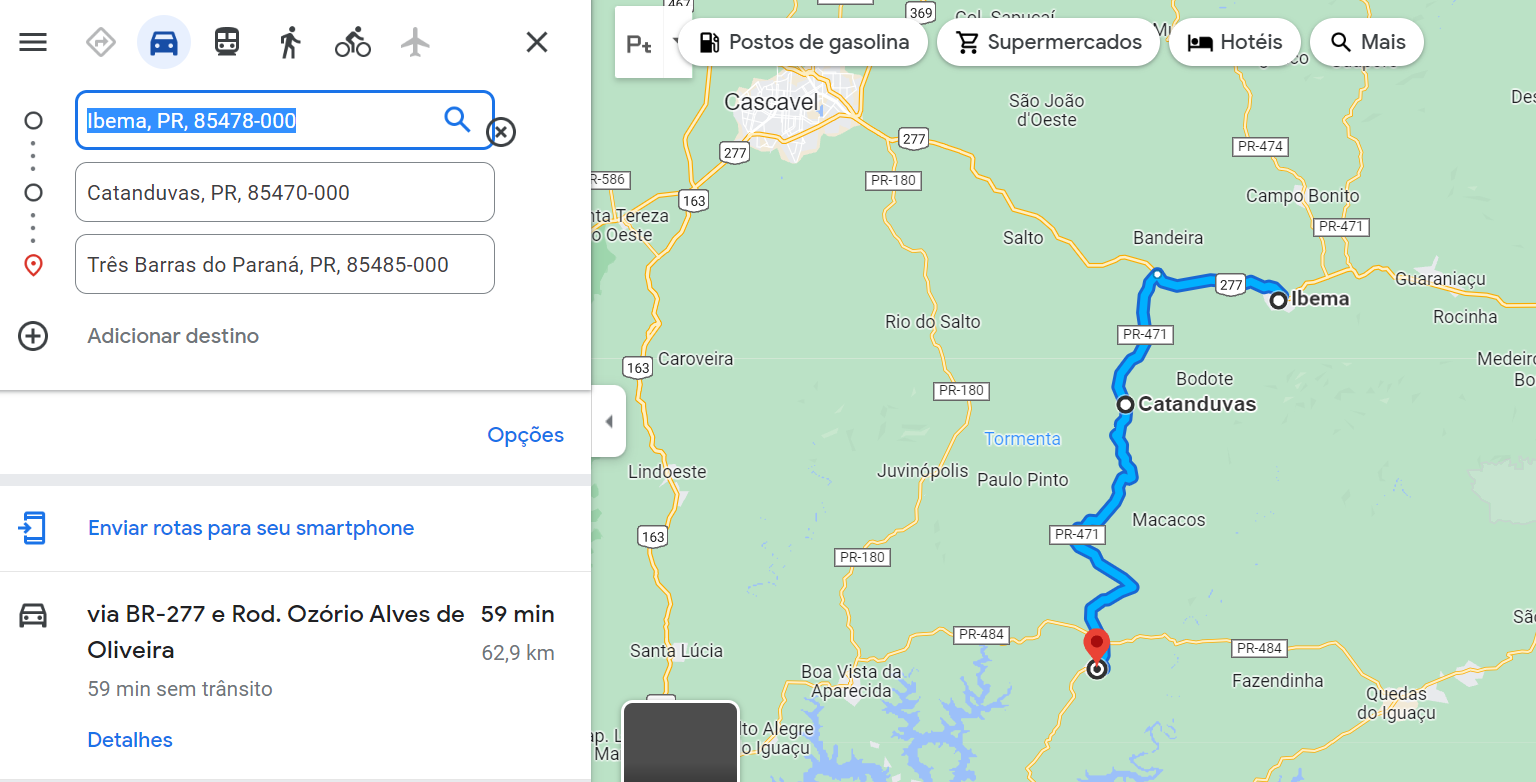

In [10]:
#   Verificando a quantidade total de eleitoras por Gênero.
#   Criando Variáveis
tote = df['QTD_ELEITORES'].sum()
tef = df['QTD_ELEITORES_FEMININO'].sum()
tem = df['QTD_ELEITORES_MASCULINO'].sum()
teni = df['QTD_ELEITORES_NAOINFORMADO'].sum()
tef = round(tef/tote, 4)*100
tem = round(tem/tote, 4)*100
teni = round(teni/tote, 4)*100
topo("Quantidade de Eleitores por Gênero Brasil")
print(f''' {"Sexo Feminino:":.<47}{tef}%
  {"Sexo Masculino:":.<47}{tem}%
  {"Sexo não informado":.<47}.{teni}%''')
lin()

-------------------------------------------------------
       Quantidade de Eleitores por Gênero Brasil        
-------------------------------------------------------
 Sexo Feminino:.................................52.49%
  Sexo Masculino:................................47.48%
  Sexo não informado..............................0.03%
-------------------------------------------------------


In [11]:
#   Quantos eleitores por gênero nos municípios
df[df['QTD_ELEITORES_MASCULINO'] > df['QTD_ELEITORES_FEMININO']].count()

PCD%                               2171
NR_ANO_ELEICAO                     2171
CD_PAIS                            2171
NM_PAIS                            2171
SG_REGIAO                          2171
NM_REGIAO                          2171
SG_UF                              2171
NM_UF                              2171
CD_MUNICIPIO                       2171
NM_MUNICIPIO                       2171
QTD_ELEITORES                      2171
QTD_ELEITORES_FEMININO             2171
QTD_ELEITORES_MASCULINO            2171
QTD_ELEITORES_NAOINFORMADO         2171
QTD_ELEITORES_MENOR16              2171
QTD_ELEITORES_16                   2171
QTD_ELEITORES_17                   2171
QTD_ELEITORES_18                   2171
QTD_ELEITORES_19                   2171
QTD_ELEITORES_20                   2171
QTD_ELEITORES_21A24                2171
QTD_ELEITORES_25A29                2171
QTD_ELEITORES_30A34                2171
QTD_ELEITORES_35A39                2171
QTD_ELEITORES_40A44                2171


In [12]:
#   Criando uma nova coluna para indicar a relação feminino x masculino
df['RELAÇAO_FM'] = df['QTD_ELEITORES_FEMININO'] / df['QTD_ELEITORES_MASCULINO']
df.head(5).T

,0,1,2,3,4
PCD%,0.43,0.27,0.75,0.26,1.14
NR_ANO_ELEICAO,2020,2020,2020,2020,2020
CD_PAIS,1,1,1,1,1
NM_PAIS,Brasil,Brasil,Brasil,Brasil,Brasil
SG_REGIAO,N,N,N,N,N
NM_REGIAO,Norte,Norte,Norte,Norte,Norte
SG_UF,AC,AC,AC,AC,AC
NM_UF,Acre,Acre,Acre,Acre,Acre
CD_MUNICIPIO,1120,1570,1058,1007,1015
NM_MUNICIPIO,ACRELÂNDIA,ASSIS BRASIL,BRASILÉIA,BUJARI,CAPIXABA


In [13]:
#   Visualizando os 10 municípios com a maior relação f/m
df.nlargest(10, 'RELAÇAO_FM').T

,3651,2892,535,3638,67,2654,2826,2913,5319,2882
PCD%,1.17,0.65,1.03,2.47,1.0,0.46,0.48,0.64,0.95,0.35
NR_ANO_ELEICAO,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020
CD_PAIS,1,1,1,1,1,1,1,1,1,1
NM_PAIS,Brasil,Brasil,Brasil,Brasil,Brasil,Brasil,Brasil,Brasil,Brasil,Brasil
SG_REGIAO,SE,NE,NE,SE,NE,NE,NE,NE,SE,NE
NM_REGIAO,Sudeste,Nordeste,Nordeste,Sudeste,Nordeste,Nordeste,Nordeste,Nordeste,Sudeste,Nordeste
SG_UF,RJ,PE,BA,RJ,AL,PB,PE,PE,SP,PE
NM_UF,Rio de Janeiro,Pernambuco,Bahia,Rio de Janeiro,Alagoas,Paraíba,Pernambuco,Pernambuco,São Paulo,Pernambuco
CD_MUNICIPIO,58122,24910,38490,58653,27855,20516,23817,25313,70718,24759
NM_MUNICIPIO,QUEIMADOS,OLINDA,SALVADOR,NITERÓI,MACEIÓ,JOÃO PESSOA,CARUARU,RECIFE,SANTOS,LAJEDO


In [14]:
#   Visualizando os 10 municípios com a menor relação f/m (mais homens)
df.nsmallest(10, 'RELAÇAO_FM').T

,2395,1236,2361,2388,2345,4999,2505,2283,2298,2408
PCD%,0.19,0.28,0.11,0.18,0.16,1.26,1.88,0.19,0.08,0.46
NR_ANO_ELEICAO,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020
CD_PAIS,1,1,1,1,1,1,1,1,1,1
NM_PAIS,Brasil,Brasil,Brasil,Brasil,Brasil,Brasil,Brasil,Brasil,Brasil,Brasil
SG_REGIAO,CO,NE,CO,CO,CO,SE,N,CO,CO,CO
NM_REGIAO,Centro-Oeste,Nordeste,Centro-Oeste,Centro-Oeste,Centro-Oeste,Sudeste,Norte,Centro-Oeste,Centro-Oeste,Centro-Oeste
SG_UF,MT,MA,MT,MT,MT,SP,PA,MT,MT,MT
NM_UF,Mato Grosso,Maranhão,Mato Grosso,Mato Grosso,Mato Grosso,São Paulo,Pará,Mato Grosso,Mato Grosso,Mato Grosso
CD_MUNICIPIO,90921,7900,90948,90980,90387,61085,4308,90263,90085,91618
NM_MUNICIPIO,SERRA NOVA DOURADA,MARAJÁ DO SENA,NOVO SANTO ANTÔNIO,SANTA CRUZ DO XINGU,NOVA BANDEIRANTES,IARAS,PAU D'ARCO,APIACÁS,CANABRAVA DO NORTE,TESOURO


<AxesSubplot:title={'center':'Relação de eleitores por sexo\n->Acima de 1 = mais femininos\n->Abaixo de 1 mais masculinos'}, ylabel='Frequency'>

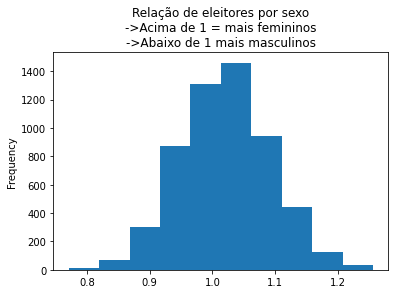

In [15]:
#   Plotando um gráfio de distribuição da relação f/m6  
df['RELAÇAO_FM'].plot.hist(title='Relação de eleitores por sexo\n->Acima de 1 = mais femininos\n->Abaixo de 1 mais masculinos')

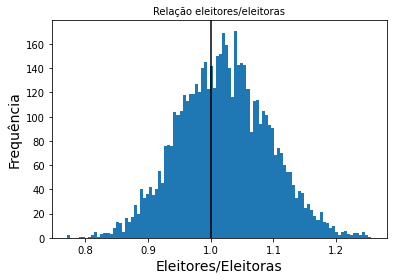

In [16]:
#   Plotando um gráfio de distribuição da relação f/m * MAIS DETALHADO *
df['RELAÇAO_FM'].plot.hist(bins=100)
plt.title('Relação eleitores/eleitoras', fontsize=10)
plt.xlabel('Eleitores/Eleitoras', fontsize=14)
plt.ylabel('Frequência', fontsize=14)
plt.axvline(1.0, color='black')

c:\Users\manda\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


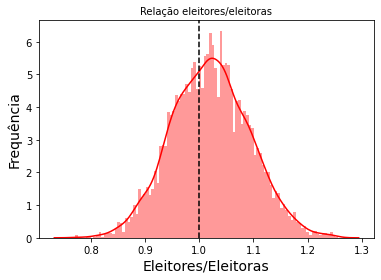

In [17]:
#   Plotando um gráfico de distruibuição com seaborn

sns.distplot(df['RELAÇAO_FM'], bins=100, color='red')
plt.title('Relação eleitores/eleitoras', fontsize=10)
plt.xlabel('Eleitores/Eleitoras', fontsize=14)
plt.ylabel('Frequência', fontsize=14)
plt.axvline(1.0, color='black', linestyle='--')

# Observa-se nos gráficos acima que existe um número maior de eleitoras do que eleitores

c:\Users\manda\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 52.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\manda\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 82.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\manda\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 82.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\manda\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 46.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(ms

Text(0.5, 1.0, 'Relação eleitores/eleitoras')

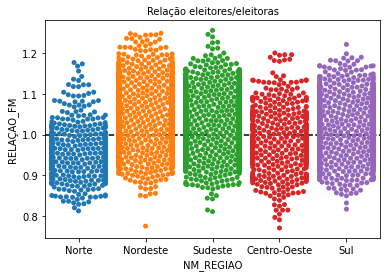

In [18]:
#   Verificar a destribuição f/m, mas agora, mostrando os pontos(municípios)
sns.swarmplot(data=df, x='NM_REGIAO', y='RELAÇAO_FM')
plt.axhline(1.0, color='black', linestyle='--')
plt.title('Relação eleitores/eleitoras', fontsize=10)

#   Análise gráfica:
-> Cada ponto representa um município.

-> A linha central representa os municípios em que o número em que a relação é equilibrada = 1;

-> Os municípios estão dividios por região;

-> Abaixo da linha tracejada são mais eleitores do sexo masculino;

-> Acima da linha tracejada são mais eleitores do sexo feminino;

-> Quanto mais distante da linha tracejada maior a diferença.

In [29]:
#   Plotando a quantidade total de eleitores por faixa etária
#   Usando o gráfico de barras horizontal
#   Listando as colunas de interesse
list =['QTD_ELEITORES_MENOR16',
       'QTD_ELEITORES_16', 'QTD_ELEITORES_17', 'QTD_ELEITORES_18',
       'QTD_ELEITORES_19', 'QTD_ELEITORES_20', 'QTD_ELEITORES_21A24',
       'QTD_ELEITORES_25A29', 'QTD_ELEITORES_30A34', 'QTD_ELEITORES_35A39',
       'QTD_ELEITORES_40A44', 'QTD_ELEITORES_45A49', 'QTD_ELEITORES_50A54',
       'QTD_ELEITORES_55A59', 'QTD_ELEITORES_60A64', 'QTD_ELEITORES_65A69',
       'QTD_ELEITORES_70A74', 'QTD_ELEITORES_75A79', 'QTD_ELEITORES_80A84',
       'QTD_ELEITORES_85A89', 'QTD_ELEITORES_90A94', 'QTD_ELEITORES_95A99']
tot_idade = df[list].sum()
print(tot_idade)

QTD_ELEITORES_MENOR16           0
QTD_ELEITORES_16           239961
QTD_ELEITORES_17           790602
QTD_ELEITORES_18          1531395
QTD_ELEITORES_19          2299649
QTD_ELEITORES_20          2859883
QTD_ELEITORES_21A24      12349829
QTD_ELEITORES_25A29      15178770
QTD_ELEITORES_30A34      15423585
QTD_ELEITORES_35A39      15938174
QTD_ELEITORES_40A44      14748141
QTD_ELEITORES_45A49      12979183
QTD_ELEITORES_50A54      12147351
QTD_ELEITORES_55A59      11198821
QTD_ELEITORES_60A64       9372283
QTD_ELEITORES_65A69       7350599
QTD_ELEITORES_70A74       5337454
QTD_ELEITORES_75A79       3446550
QTD_ELEITORES_80A84       2266484
QTD_ELEITORES_85A89       1227487
QTD_ELEITORES_90A94        741147
QTD_ELEITORES_95A99        423377
dtype: int64


<AxesSubplot:title={'center':'Eleitores por faixa etária'}>

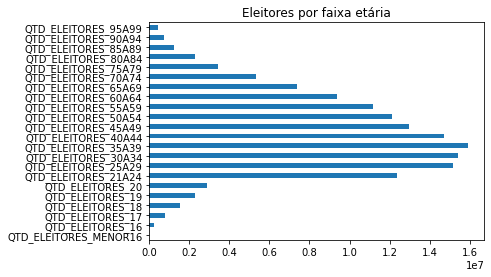

In [36]:
#   Mostrando no gráfico horizontal
tot_idade.plot.barh(title='Eleitores por faixa etária')


#   Verificamos que o maior numero de eleitores esta concentrado na faixa de idade dos 35 ao 39.
#   Na faixa dos 29 anos aos 59 também temos um volume maior de eleitores que nas outras.